In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [6]:
data=pd.read_csv(r"c:\Users\aakan\Downloads\BOSTON\HousingData.csv")

In [7]:
data=data.dropna()
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [8]:
X=data.drop('MEDV',axis=1)
y=data['MEDV']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [9]:
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [10]:
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1)
])

In [11]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [12]:
history=model.fit(X_train,y_train,epochs=100,validation_split=0.2,verbose=1)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 550.5392 - mae: 21.3228 - val_loss: 502.1013 - val_mae: 20.9423
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 516.3954 - mae: 20.5314 - val_loss: 471.2924 - val_mae: 20.2029
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 481.7339 - mae: 19.6948 - val_loss: 436.8581 - val_mae: 19.3436
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 441.7979 - mae: 18.7015 - val_loss: 394.3467 - val_mae: 18.2519
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 393.0538 - mae: 17.4613 - val_loss: 341.1327 - val_mae: 16.8222
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 333.1204 - mae: 15.8864 - val_loss: 277.4710 - val_mae: 14.9760
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 263.0489 - mae: 13.9284 - val_loss: 207.9593 - val_mae: 12.7342
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 189.2601 - mae: 11.7070 - val_loss: 141.3811 - val_mae: 10.1518
Epoch 9/100
8/8 ━━━━━━━━

In [13]:
test_loss,test_mae=model.evaluate(X_test,y_test)
print(f"\nTest MAE: {test_mae:.2f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 27.7993 - mae: 2.8770 

Test MAE: 2.76


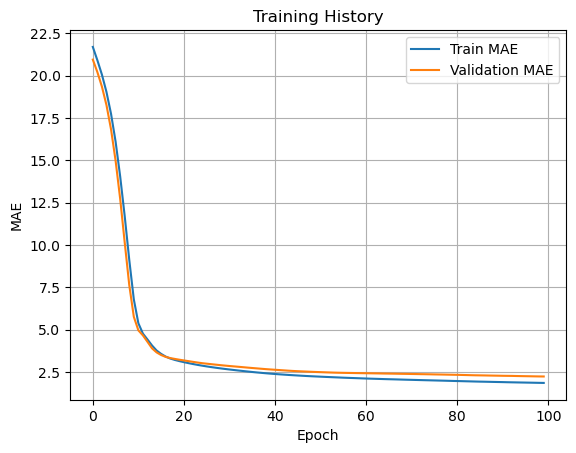

In [14]:
plt.plot(history.history['mae'],label='Train MAE')
plt.plot(history.history['val_mae'],label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.title('Training History')
plt.grid(True)
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on test set
y_pred = model.predict(X_test).flatten()

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Mean Squared Error (MSE): 25.10
Root Mean Squared Error (RMSE): 5.01
R² Score: 0.70
